# Analyse Run #

This is a template notebook to browse the results of a evolution simulation.

Please _Restart & Run All_ to make shure you start with a clean notebook.

## Import required libraries

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from  ipywidgets import widgets 
from ipywidgets import interact, interactive, fixed
from IPython.display import display,HTML,clear_output
import os 
import phievo.AnalysisTools as AT
#HTML('''<script>code_show=true;function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

execute initialization_code.py
Execute mutation.py
Execute classes_eds2.py
Execute deriv2
Execute interaction.py
Execute CorePromoter (Interaction Template)
Execute TFHill (Interaction Template)
Execute PPI (Interaction Template)
Execute LR (Interaction Template)
Execute Phosphorylation (Interaction Template)
Execute Degradation (Interaction Template)
Execute plotdata.py
Execute palette.py


## Enter the run information

In [2]:
## Important variables
run = None ## Directory of the evolution to analyse
seed = None ## Seed of the run
net = None ## Generation for one evolution
initial = None
data = None ##
buffer = None ## Input to use for the dynamics
inouts = None ## Nb of different input to use to test the dynamics

In [3]:
widget_run = widgets.Text(value='',placeholder='Name of the run directory',description='Directory:',disabled=False)
widget_seed = widgets.Dropdown(options={"None":None},value=None,description='Seed:',disabled=True)
widget_loadDir = widgets.Button(description="Load Run",disabled=True)
widget_gen = widgets.IntSlider(value = 0,min=0,max=0,description = 'Gen:')

choices = ["fitness","generation","n_interactions","n_species"]
widget_Xobs = widgets.Dropdown(options=choices,value="generation",description='x-axis:',disabled=True)
widget_Yobs = widgets.Dropdown(options=choices,value="fitness",description='y-axis:',disabled=True)
widget_replot_observable = widgets.Button(description="Plot",disabled=True)
widget_replot_fitness = widgets.Button(description="Plot fitness",disabled=True)
#
foundDirFlag = False
foundSeedFlag = False
foundGen = False
foundFile_widget = widgets.HTML("")
foundSeed_widget = widgets.HTML("")
maxSeedDict = {}
found_str = "<p style=\"color:#31B404;font-size: 30px;\">✔</p>"
notfound_str = "<p style=\"color:#DF3A01;font-size: 30px;\">✘</p>"

def inspect_run(path):
    """
    Test if the dir name exists
    
    Args:
        path (str): path of the directory
    """
    global foundDirFlag
    ## Search for the Simulation directory
    if os.path.isdir(path):
        foundSeed_widget.value = ""
        foundDirFlag = True
        foundFile_widget.value = found_str
        widget_loadDir.disabled=False
    else:
        foundDirFlag = False
        foundFile_widget.value = notfound_str
        widget_loadDir.disabled=True

def onLoadRunClicked(button):
    widget_loadDir.button_style = "success"
    widget_loadDir.disabled=True
    global run
    run = AT.Simulation(widget_run.value)
    widget_seed.options = {"Seed%d"%i:i for i,seed in run.seeds.items()}
    widget_seed.value = widget_seed.options["Seed1"]
    widget_seed.disabled = False
    
widget_loadDir.on_click(onLoadRunClicked)
interactive(inspect_run,path=widget_run);
main_options = widgets.VBox([widgets.HBox([widget_run,foundFile_widget]),widget_loadDir])
display(main_options)

## Select the seed to study

In [4]:

def set_seed(from_selector):
    global seed
    seed = from_selector
    widget_gen.max = len(run.seeds[seed].generations)-1
    
    widget_Xobs.disabled = False
    widget_Yobs.disabled = False
    widget_replot_observable.disabled = False
    if run.inits.prmt["pareto"]:
        widget_replot_fitness.disabled = False
    else:
        widget_replot_fitness.disabled = True
interactive( set_seed,from_selector=widget_seed);
display(widget_seed)

## Plot observable

Hey


<IPython.core.display.Javascript object>


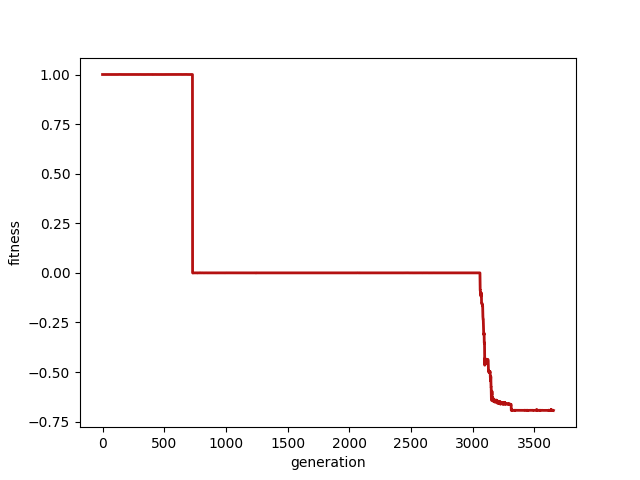

In [5]:

def replot_observable(b):
    plt.close()
    clear_output()
    run.custom_plot(seed,widget_Xobs.value,widget_Yobs.value)
    
def replot_fitness(b):
    plt.close()
    clear_output()
    run.show_fitness(seed)
    
plot_observable_options = widgets.VBox([widgets.HBox([widget_Xobs,widget_Yobs]),widgets.HBox([widget_replot_observable,widget_replot_fitness])])
widget_replot_fitness.on_click(replot_fitness)
widget_replot_observable.on_click(replot_observable)

display(plot_observable_options)

## Look at one generation

In [6]:
widget_selectCell = widgets.IntSlider(value = 0,min=0,max=0,description = 'Cell:')
button_plotLayout = widgets.Button(description="Plot network layout",disabled=True)
widget_selectTimePoint = widgets.IntSlider(value = 0,min=0,max=0,description = 'Time:')
def select_network(gen_index):  
    if run and seed:
        global net
        net = run.get_best_net(seed,gen_index)
        widget_selectCell.max = run.inits.prmt["ncelltot"]-1
        widget_selectTimePoint.max = run.inits.prmt["nstep"]-1
        button_plotLayout.disabled = False
interactive(select_network,gen_index=widget_gen)
display(widget_gen)

<IPython.core.display.Javascript object>


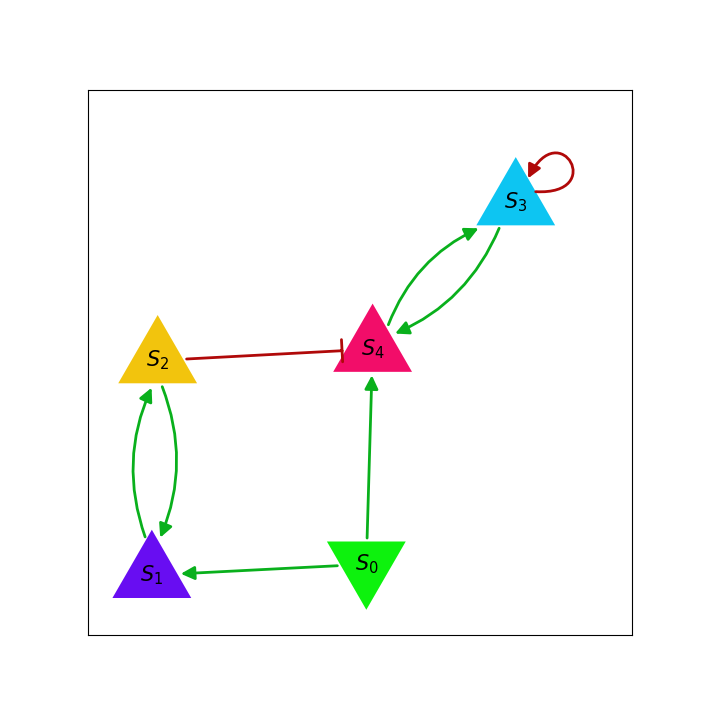

In [7]:

def listen_plotLayout(b):
    plt.close()
    clear_output()
    net.draw()
button_plotLayout.on_click(listen_plotLayout)
display(button_plotLayout)

## Generation's dynamics

In [8]:
widget_nputs = widgets.IntText(value=1,description='N :',disabled=False)
widget_plotInput = widgets.IntSlider(value = 0,min=0,max=0,description = 'Input:')

button_launchRun = widgets.Button(description="Run dynamics")

def generate_inputs(ntrials):
    widget_plotInput.max = ntrials
    global data
    run.run_dynamics(net=net,erase_buffer=False,trial=widget_nputs.value)
    widget_plotInput.max = widget_nputs.value-1
def listen_launchRun(b):
    generate_inputs(widget_nputs.value)
button_launchRun.on_click(listen_launchRun)
widgets.HBox([widget_nputs,button_launchRun])

## Select initiation number 

In [9]:
def change_input(val):
    global initial 
    initial = val 
interactive(change_input,val=widget_plotInput)


## Plot Dynamics 

<IPython.core.display.Javascript object>


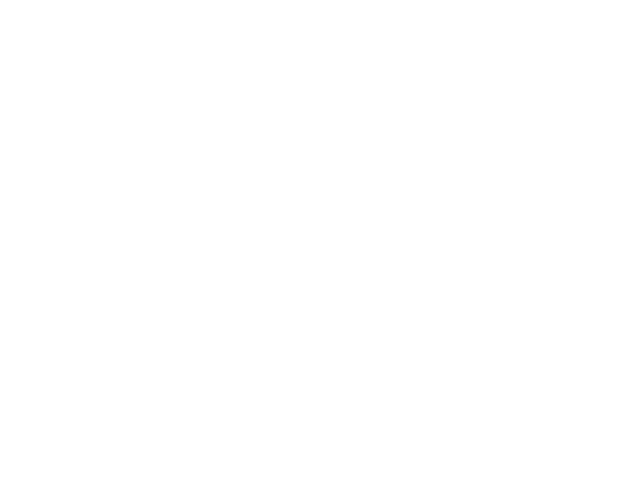

In [10]:
button_plotdynamcis = widgets.Button(description="Plot dynamics")
def plot_dynamics(signal):
    plt.close()
    clear_output()
    run.Plot_Data(initial,cell=widget_selectCell.value)
button_plotdynamcis.on_click(plot_dynamics)
#display(widgets.VBox([widgets.HBox([widget_run,foundFile_widget]),widget_loadDir]))
display(widgets.VBox([widgets.HBox([widget_selectCell,button_plotdynamcis])]))

## Cell profile

<IPython.core.display.Javascript object>


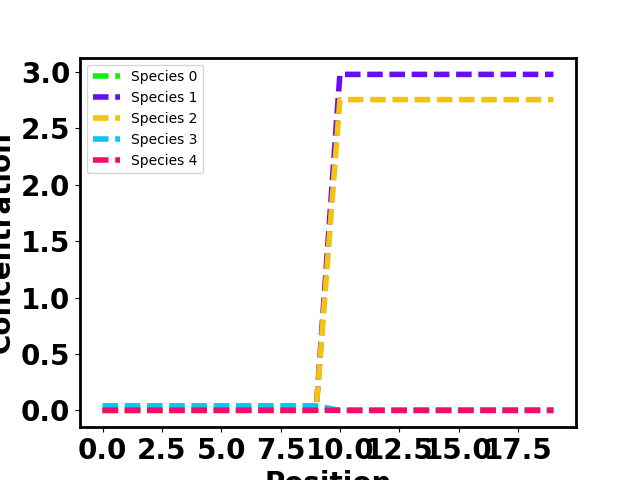

In [11]:
button_plotprofile = widgets.Button(description="Plot Profile")
def plot_profile(signal):
    plt.close()
    clear_output()
    run.Plot_Profile(trial_index=widget_plotInput.value,time=widget_selectTimePoint.value)
button_plotprofile.on_click(plot_profile)
display(widgets.VBox([widgets.HBox([widget_selectTimePoint,button_plotprofile])]))